# Image Processing HW2

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import math as Math
from IPython.display import Image

### Question 1

In [2]:
def adjust_gamma(image, gamma = 1.0):
    #build a lookup table mapping the pixel values [0. 255] to their adjusted
    #gamma values. 
    invGamma = 1.0/ gamma
    table = np.array([((i/255.0)** invGamma) *255
        for i in np.arange(0, 256)]).astype("uint8")
    #apply gamma correction using the lookup table. 
    return cv2.LUT(image, table)


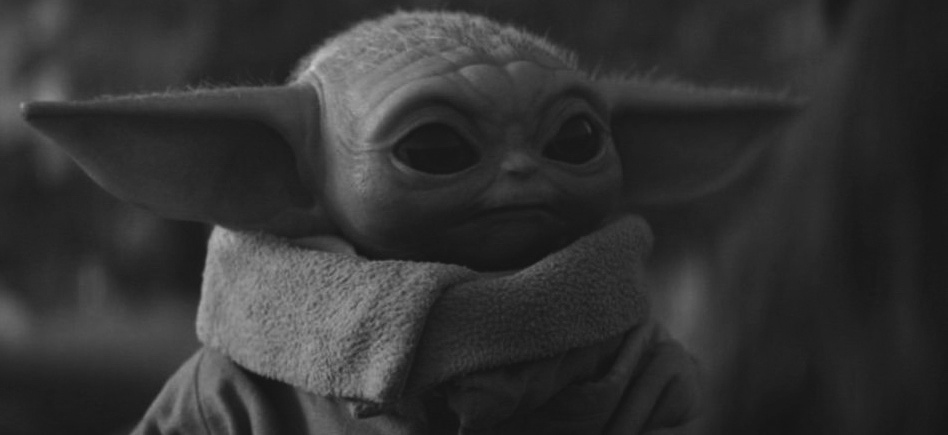

In [3]:
img = cv2.imread('../ImageProcessing/ImageProcessing/baby_yoda.jpg')

grayunderexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x = cv2.imwrite('../ImageProcessing/ImageProcessing/grayUnderexposed.jpg',grayunderexposed)
# cv2.imshow('image', grayunderexposed)

# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)
Image('../ImageProcessing/ImageProcessing/grayUnderexposed.jpg')

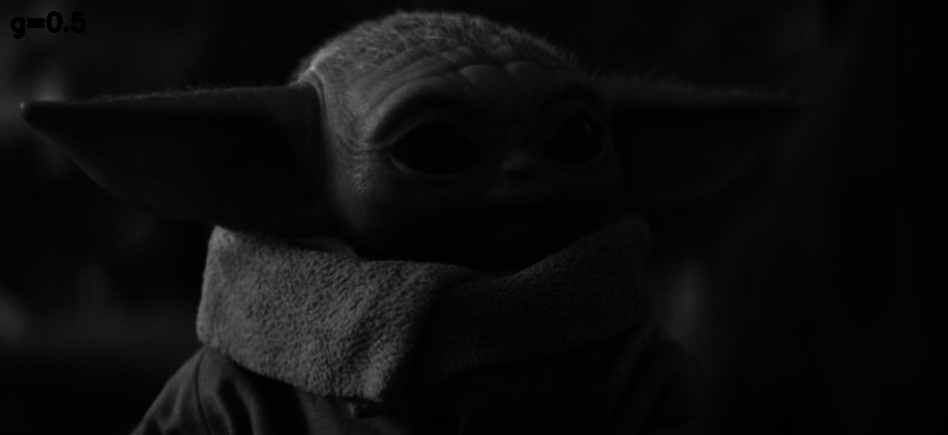

In [4]:
adjusted = adjust_gamma(grayunderexposed, gamma=0.5)
cv2.putText(adjusted, "g={}".format(0.5), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
x = cv2.imwrite("../ImageProcessing/ImageProcessing/baby_yoda_gammam_image_1.jpg", adjusted)

Image('../ImageProcessing/ImageProcessing/baby_yoda_gammam_image_1.jpg')

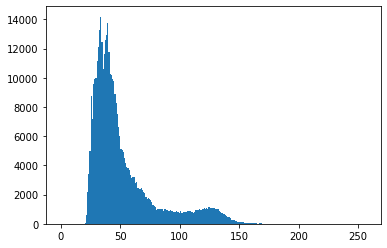

In [5]:
plt.hist(grayunderexposed.ravel(),256,[0,256])
plt.show()

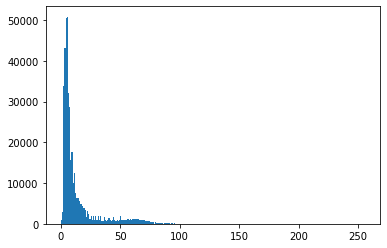

In [6]:
plt.hist(adjusted.ravel(),256,[0,256])
plt.show()

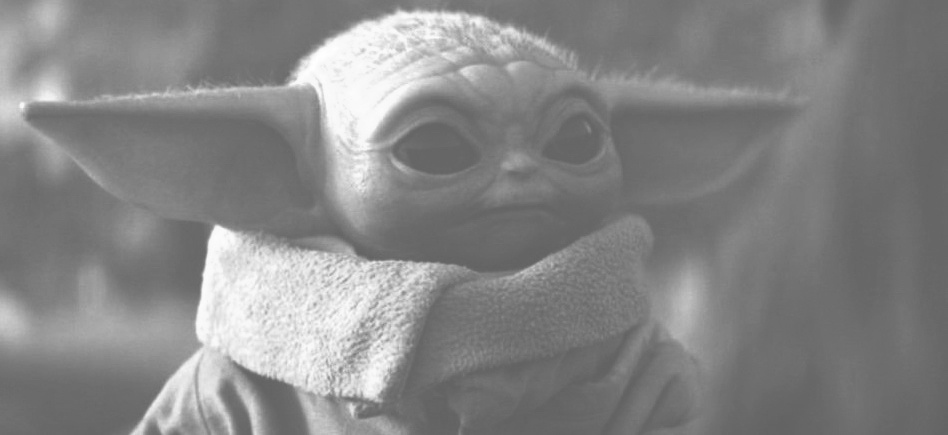

In [7]:
img = cv2.imread('../ImageProcessing/ImageProcessing/baby_yoda_overexposed.jpg')

grayoverexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x = cv2.imwrite('../ImageProcessing/ImageProcessing/overexposedimage1.jpg', grayoverexposed)

Image('../ImageProcessing/ImageProcessing/overexposedimage1.jpg')

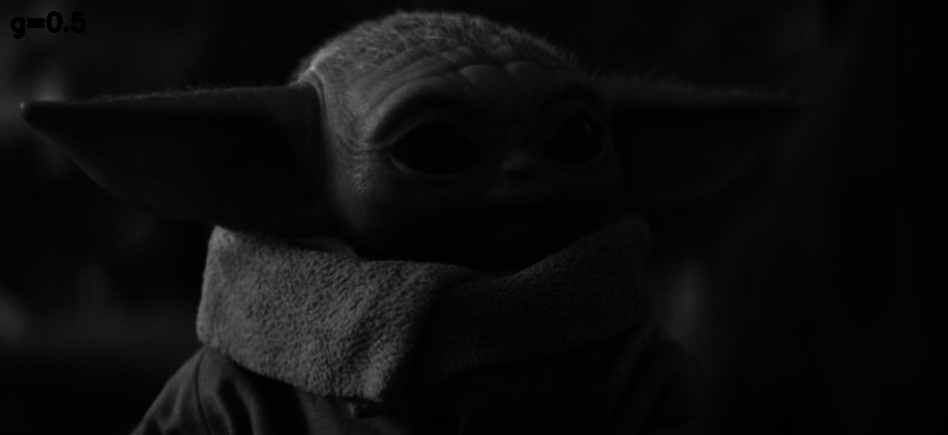

In [8]:
adjustednew = adjust_gamma(grayunderexposed, gamma=0.5)
cv2.putText(adjusted, "g={}".format(0.5), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
cv2.imwrite("../ImageProcessing/ImageProcessing/overexposed_gammam_image_2.jpg", adjusted)

Image('../ImageProcessing/ImageProcessing/overexposed_gammam_image_2.jpg')

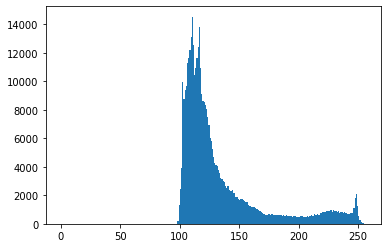

In [9]:
plt.hist(grayoverexposed.ravel(),256,[0,256])
plt.show()

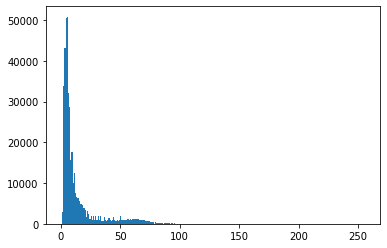

In [10]:
plt.hist(adjustednew.ravel(),256,[0,256])
plt.show()

### Question 2

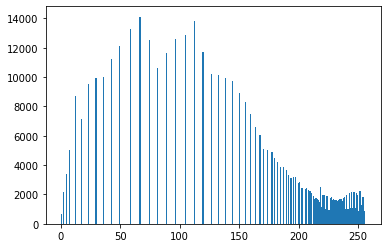

In [11]:
img = cv2.imread('../ImageProcessing/ImageProcessing/grayUnderexposed.jpg')

grayunderexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('image', grayunderexposed)
underimg = cv2.equalizeHist(grayunderexposed)

plt.hist(underimg.ravel(),256,[0,256])
plt.show()


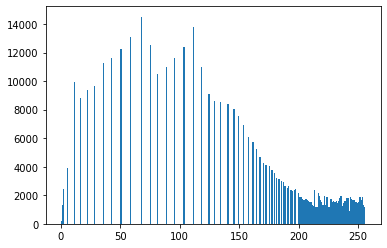

In [12]:
img = cv2.imread('../ImageProcessing/ImageProcessing/overexposedimage1.jpg')

grayoverexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('image', grayoverexposed)
overimg = cv2.equalizeHist(grayoverexposed)

plt.hist(overimg.ravel(),256,[0,256])
plt.show()

### Question 3

In [13]:
#kernels
w1 = float(1)*np.array([[1,1,1],[1,1,1],[1,1,1]])
w2 = float(1/5)*np.array([[0,1,0],[1,1,1],[0,1,0]])
# w2.shape
w3 = float(1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]])
combined_kernels = {1: [w1],2: [w1, w2],3: [w1, w2, w3]}
img = cv2.imread('../ImageProcessing/ImageProcessing/baby_yoda.jpg')
combined_kernels[3][0].shape

(3, 3)

In [14]:
def manualHist(img):
    row = img.shape
    col = img.shape #
    y = np.zeros((256), np.uint64)
#     r = range(0,row)
    for i in range(row[0]):
        for j in range(col[0]):
            y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x,y,color="blue",align="center")
    plt.ylabel('Intensity')
    plt.xlabel('Bits')
    graph = plt.show()
#     print(row)
#     print(col)
    return np.array([x,y])

In [15]:
#implement convolutions function
def implement_convolutions(grey,kernel):
    return np.array([cv2.filter2D(grey, -1, kernel) for kernel in combined_kernels])

	 Histogram for Baby Yoda image


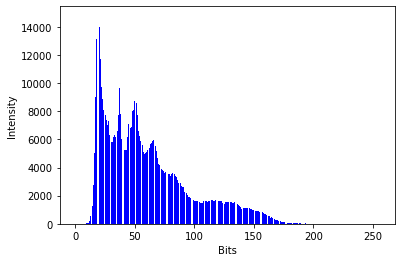

In [16]:
#get historgram of baby_yoda image
print("\t Histogram for Baby Yoda image")
x = manualHist(img)
# x # this will show the np_array

Original Image


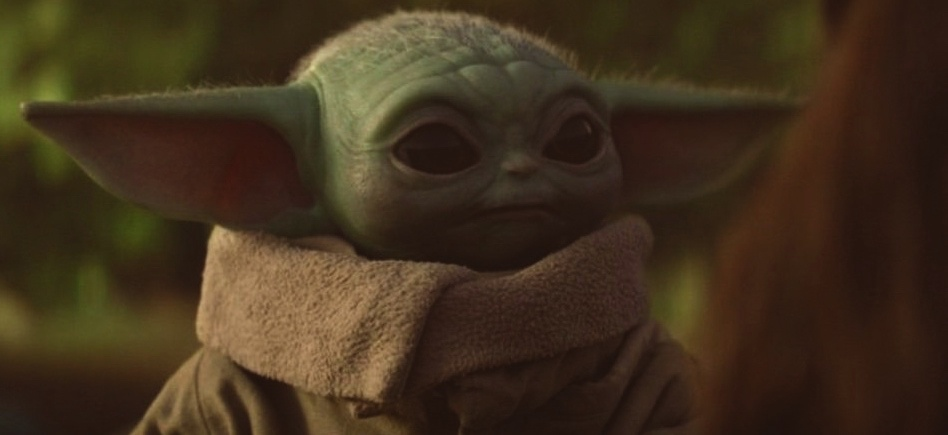

In [17]:
print("Original Image")
imgPreview = Image('../ImageProcessing/ImageProcessing/baby_yoda.jpg')
imgPreview

In [18]:
convolution_for_w1 = implement_convolutions(img, combined_kernels[3][0])
convolution_for_w2 = implement_convolutions(img, combined_kernels[3][1])
convolution_for_w3 = implement_convolutions(img, combined_kernels[3][2])

In [19]:
#sort indicies from least to greatest for matchign
def sort_in_order(matrix):
    rotate = np.rot90(matrix)
    sorted_complete = np.lexsort(rotate)
    return matrix[sorted_complete]

In [20]:
#goal is to have all intensity values the same
def normalized_pixels(img,num_kernels):
    kernels = combined_kernels[num_kernels]
    x=np.array([signal.convolve2d(img, kernel, 'same') for kernel in kernels])
    norm_images = x
    img_size = norm_images[0].shape[0]*norm_images[0].shape[1]
    # print(img_size)
    img_size = norm_images.reshape((num_kernels, img_size)).transpose()
    return img_size

In [1]:
def histogram_matching(img, rf, kernels):
        newImgsize = img.shape[0]*img.shape[1];
        merged_images = np.empty((newImgsize, 5))
        merged_images[:, 0] = img.reshape((newImgsize),)
        average_of_three = normalized_pixels(img,3)
        # converted to 1D image
        flat_image = np.arange(newImgsize).transpose()
        print(len(flat_image))
        merged_images[:, -1] = flat_image

        
        for dimension in range(0, kernels):
            merged_images[:, dimension + 1] = average_of_three[:, dimension]

        # Hey I sorted the pixels from smallest to largest here
        rotate = np.rot90(merged_images)
        sorted_pixels = np.lexsort(rotate)
        for dimension in range(0, kernels):
            merged_images[:, dimension + 1] = average_of_three[:, dimension]
        combined_imgs = merged_images[sorted_pixels]
        
        
        for gray in range(0, len(rf)):
            i = 0
            i_stop = int(i + rf[gray])
            combined_imgs[i:i_stop, 0] = gray
            i = i_stop
        
        combined_imgs = combined_imgs[combined_imgs[:, -1].argsort()]
        final_img = combined_imgs[:, 0].reshape(img.shape) #last column is the index at which the values are stored
        
        return final_img

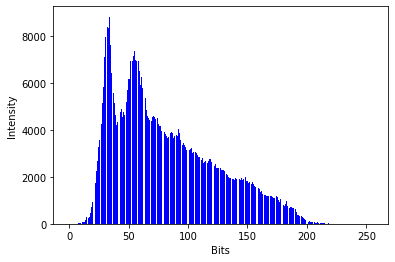

(2, 256)
412380
412380
412380


True

In [22]:
original_img = cv2.imread('../ImageProcessing/ImageProcessing/baby_yoda.jpg')
reference_img = cv2.imread('../ImageProcessing/ImageProcessing/reference.jpg')
reference_histogram = manualHist(reference_img)
print(reference_histogram.shape)

new_output_array = np.empty(original_img.shape) #no values initialized
# print("New output array before: %s " % new_output_array)


for i in range(0,3):
    new_output_array[:, :, i] = histogram_matching(original_img[:, :,i], reference_histogram[:,i],3)
# print("Output array after: %s " % new_output_array)
    new_target_img = new_output_array
cv2.imwrite('../ImageProcessing/ImageProcessing/result.jpg', new_target_img)

Histogram of Original Image


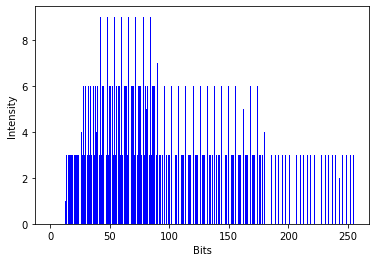

(3, 435, 948, 3)

In [23]:
print("Histogram of Original Image")
manualHist(convolution_for_w1)
convolution_for_w1.shape

In [24]:
convolution_for_ref = implement_convolutions(reference_img, combined_kernels[3])

	 Histogram of Reference Image


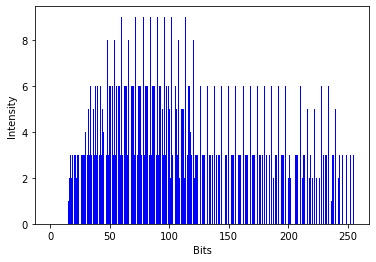

(3, 435, 948, 3)

In [25]:
print("\t Histogram of Reference Image")
manualHist(convolution_for_ref)
convolution_for_ref.shape

Reference Image


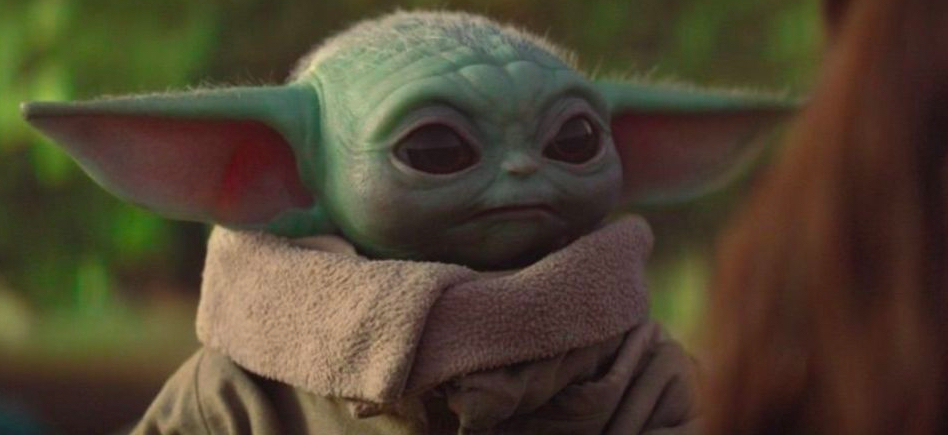

In [26]:
print("Reference Image")
Image('../ImageProcessing/ImageProcessing/reference.jpg')

Resulting Image


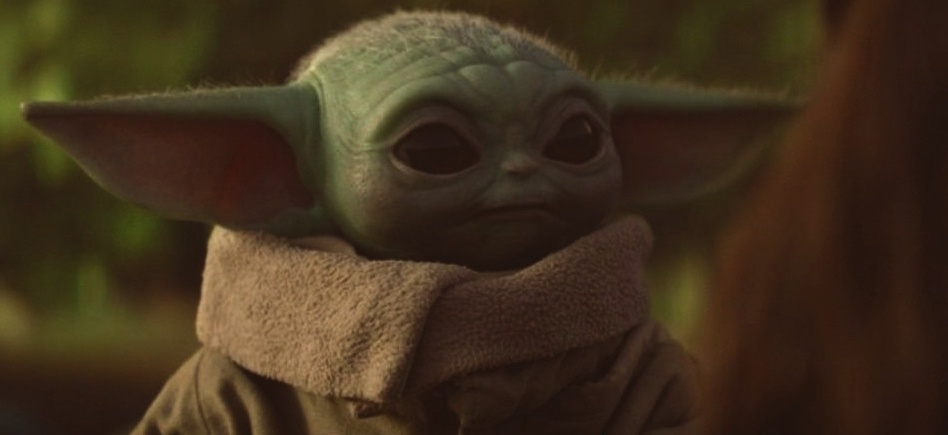

In [27]:
print("Resulting Image")
Image('../ImageProcessing/ImageProcessing/result.jpg')

### Question 4

Gaussian Blur


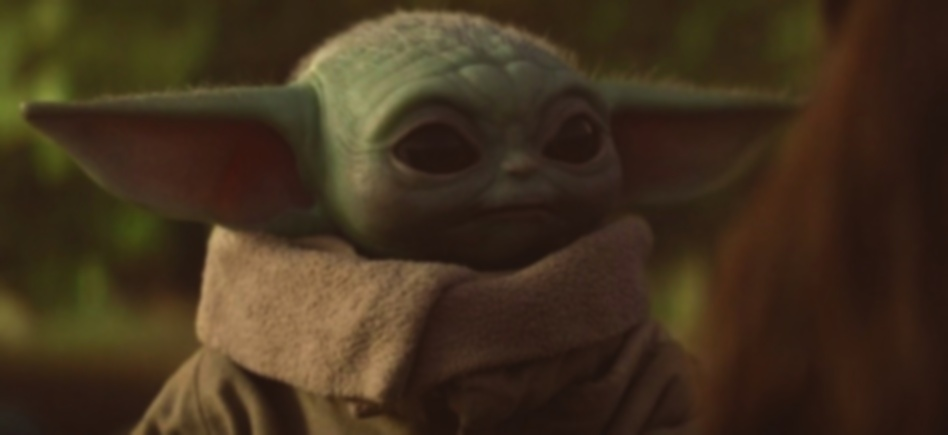

In [17]:
print("Gaussian Blur")
tester = cv2.imread('../ImageProcessing/ImageProcessing/result.jpg')
x = cv2.GaussianBlur(tester,(9,9),0)
cv2.imwrite('../ImageProcessing/ImageProcessing/gaussianBlur.jpg', x)
Image('../ImageProcessing/ImageProcessing/gaussianBlur.jpg')

Box Filter


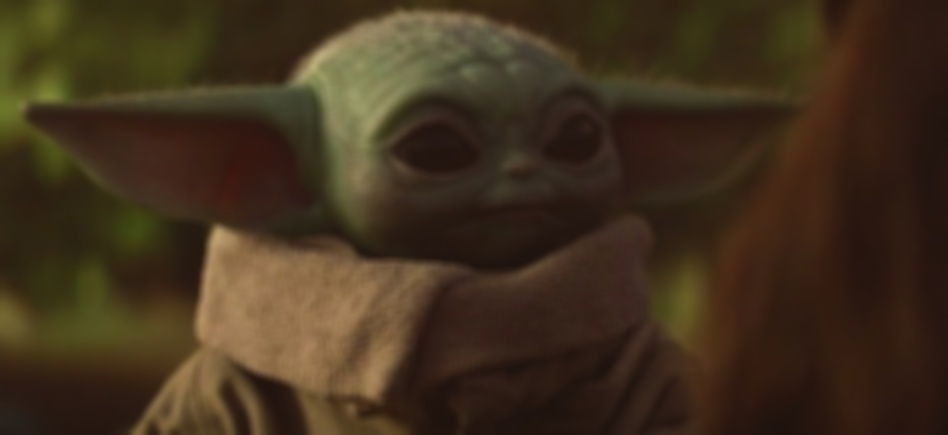

In [18]:
print("Box Filter")
tester = cv2.imread('../ImageProcessing/ImageProcessing/result.jpg')
x = cv2.boxFilter(tester, -1, (9,9))
cv2.imwrite('../ImageProcessing/ImageProcessing/BoxFilter.jpg', x)
Image('../ImageProcessing/ImageProcessing/BoxFilter.jpg')